# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing packeges


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split ,GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score  
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

### Importing the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# reading the csv file
df = pd.read_csv('/content/drive/My Drive/Hiring_Challenge/Telecom/Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [4]:
# shape of the dataset
df.shape

(7043, 21)

In [5]:
# cheking the data type
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [0]:
# lets change the data type of SeniorCitizen and TotalCharges
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

# Convert string label to float : male = 1, female = 0
dict = {'Churn':{'Yes':1,'No':0}}      # label = column name
df.replace(dict,inplace = True)   

In [7]:
# checking the missing data
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [0]:
# let's fill the total charges with mean value due to continous variable
df['TotalCharges'].fillna((df['TotalCharges'].mean()), inplace = True)

In [9]:
# Let's check the data variable again
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values  
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

description(df)

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,customerID,object,0,7043,7590-VHVEG,5575-GNVDE,3668-QPYBK
1,gender,object,0,2,Female,Male,Male
2,SeniorCitizen,object,0,2,0,0,0
3,Partner,object,0,2,Yes,No,No
4,Dependents,object,0,2,No,No,No
5,tenure,int64,0,73,1,34,2
6,PhoneService,object,0,2,No,Yes,Yes
7,MultipleLines,object,0,3,No phone service,No,No
8,InternetService,object,0,3,DSL,DSL,DSL
9,OnlineSecurity,object,0,3,No,Yes,Yes


In [0]:
#  Let's group the Tenure and convert into categorical column.
## 'M' discribe month between.
def tenure_grouped(df) :
    if df["tenure"] <= 12 :
        return "M_0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "M_12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "M_24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "M_48-60"
    elif df["tenure"] > 60 :
        return "M_gt_60"
df["tenure"] = df.apply(lambda df:tenure_grouped(df), axis = 1)

In [11]:
df['tenure'].unique()

array(['M_0-12', 'M_24-48', 'M_12-24', 'M_gt_60', 'M_48-60'], dtype=object)

In [0]:
# Separating the catagorical variables and numerical variable and target for further analysis
## catagoricals columns
cat_cols = [c for c in df.columns if c not in ['customerID', 'MonthlyCharges', 'TotalCharges', 'Churn']]

num_cols = ["MonthlyCharges", "TotalCharges"]

target = ["Churn"]

In [13]:
# let's describe numerical feature
df[num_cols].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2283.300441
std,30.090047,2265.000258
min,18.250000,18.800000
25%,35.500000,402.225000
50%,70.350000,1400.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


* There are 7043 customers and 19 independed variables with one dependend variable (Churn).

* We have only 11  missing varibles in TotalCharges variable.

* Most of variables are catagoricals except tenure, Mothly Charges, Total Charges.

### Data Visualization

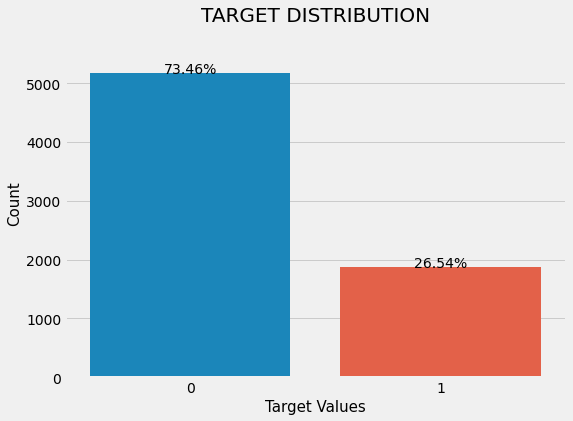

In [14]:
# Let's see the distribution of taget variable.

total = len(df)
plt.figure(figsize=(8,6))

g = sns.countplot(x='Churn', data=df)
g.set_title("TARGET DISTRIBUTION", fontsize = 20)
g.set_xlabel("Target Values", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
sizes=[] # Get highest values in y
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

plt.show()

we can see that data is imbalanced with **73.46 % of No's** and **26.56% of Yes's.**

Accuracy metric is not useful here it will mislead the result. So, we've to look into F1 Score and AUC metrics for model evalution.

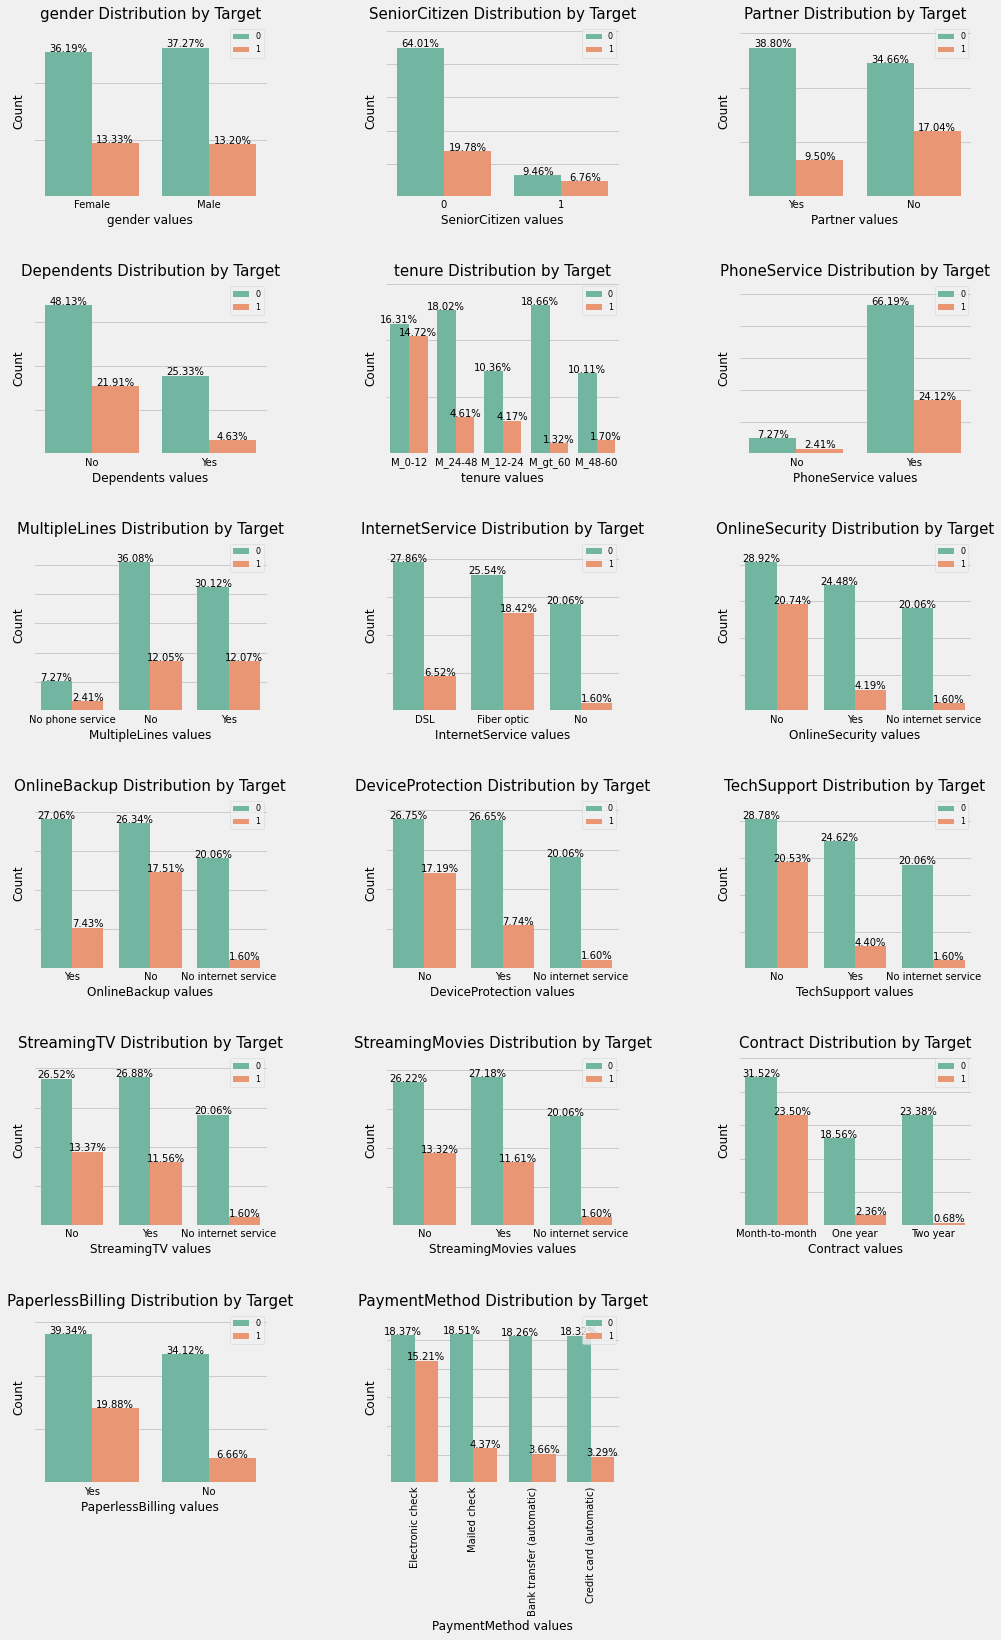

In [15]:
# visualizating catagorical variable by target
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(6, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(15,25)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(df[cat_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=df, hue='Churn', palette='Set2') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8) 
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights

plt.xticks(rotation=90) 
plt.show()

We can't see any clear pattern to negative values (No's) in target.
* It's interesting to see that in gender male and female have some ratio of left the company.

* Internet service with fiber optics have more churned users compare to the DSL and have no  internet service.

* Those don't have online backup and online security have more chured users.

* Month to month contract customer had left the company more that one year and two year contract.

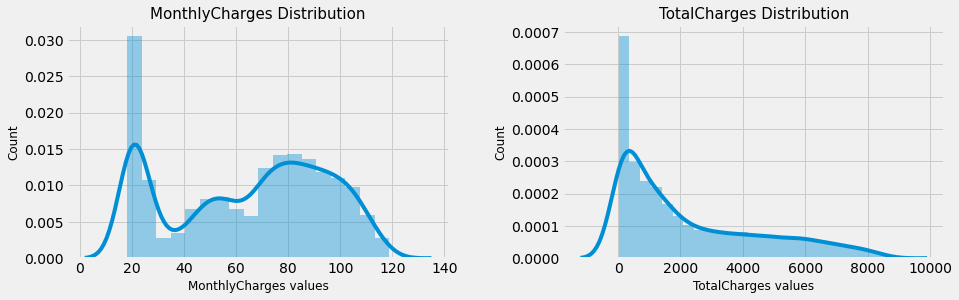

In [16]:
# visualizating numerical variable
grid = gridspec.GridSpec(1, 2, wspace=0.3) # The grid of chart
plt.figure(figsize=(14, 4)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(df[num_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.distplot(df[col]) 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
plt.show()

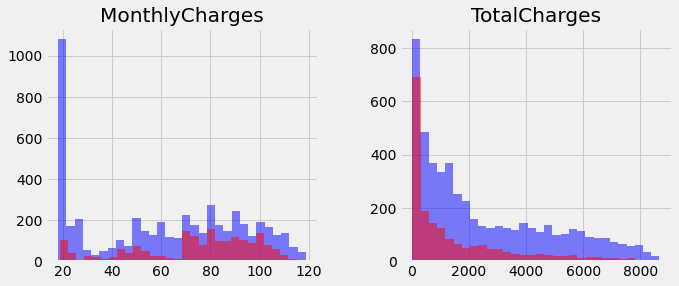

In [17]:
# visualizating numerical variable by target variable
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df[df.Churn == 0][num_cols].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 1][num_cols].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.show()

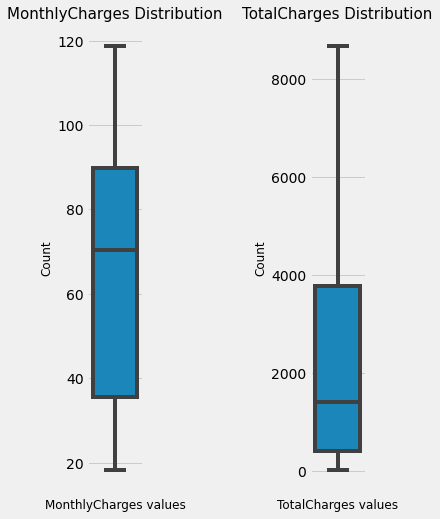

In [18]:
# visualizating numerical variable
grid = gridspec.GridSpec(1, 3, wspace=3) # The grid of chart
plt.figure(figsize=(8, 8)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(df[num_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.boxplot(y= df[col]) 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
plt.show() 

It's seems total charges is little positive skewed and numerical variable don't have outlier.

### Data preprocessing

In [19]:
# one-hot encoding the catagorical feature
dummies = pd.get_dummies(df[cat_cols], drop_first=True, sparse=True)

# Standarize numeric features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[num_cols])
# Retrive column names
scaled = pd.DataFrame(data = scaled, columns = num_cols, index = df[num_cols].index)

# concating the one-hot encoded and scaled feature
df_processed = pd.concat([dummies, scaled], axis=1)

print('Dimension of processed data', df_processed.shape)

Dimension of processed data (7043, 33)


In [0]:
# setting up the X and y
X = df_processed.values
y = df['Churn']
# split into train/test sets with same class ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=4000, random_state=101, stratify=y)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 33), (3043, 33), (4000,), (3043,))

### Implement Machine Learning Models

In [0]:
# Define the model
seed = 55
# 1.Logistic Regression
lr = LogisticRegression()

#2.Random Forest Classifier
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

# 3. Extra Trees Classifier
et = ExtraTreesClassifier(random_state = seed)

# 4.Decision Tree Classifier
dt = DecisionTreeClassifier(random_state = seed)

#5. XGBoost 
xgbc = XGBClassifier(random_state = seed, n_job = -1)

In [0]:
# Create a function that returns classification_report of different models.

def class_report(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    report = classification_report(y_test, preds)
    return print(report)

In [24]:
print('Report of Logistic Regression')
class_report(lr)
print('\n')
print('Report of RandomForest Classifier')
class_report(rf)
print('\n')
print('Report of ExtraTrees Classifier')
class_report(et)
print('\n')
print('Report of  Tree Classifier')
class_report(dt)
print('\n')
print('Report of XGB Classifier')
class_report(xgb)

Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2235
           1       0.66      0.51      0.58       808

    accuracy                           0.80      3043
   macro avg       0.75      0.71      0.72      3043
weighted avg       0.79      0.80      0.79      3043



Report of RandomForest Classifier
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2235
           1       0.63      0.48      0.55       808

    accuracy                           0.79      3043
   macro avg       0.73      0.69      0.70      3043
weighted avg       0.77      0.79      0.78      3043



Report of ExtraTrees Classifier
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2235
           1       0.58      0.47      0.52       808

    accuracy                           0.77      3043
   macro avg       0.70     

Baseline model failed to predict positive target. It's seems LR and XGB classifier are best model compare to the ET and RF. 

### Tuning Hyperparameters 
Now let's add Grid Search to all the classifiers with the hopes of optimizing their hyperparameters and thus improving their accuracy. Are the default model parameters the best bet? Let's find out.

In [0]:
# Define all the models' hyperparameters one by one first

## FOR LR
lr_params = {'penalty':['l1', 'l2'],
             'solver':['lbfgs', 'liblinear'],
             'C': np.logspace(0, 4, 10)}

## For RF
rf_params = {'n_estimators':[100, 200, 300],
             'min_samples_leaf':[ 2, 3],
             'min_samples_split':[6, 7], 
             'random_state':[44]}

## For ETC
et_params = {'max_features':[3, 10],
              'min_samples_split':[3, 10],
              'min_samples_leaf':[3, 10],
              'n_estimators':[100, 300],
              'criterion':["gini"], 
              'random_state':[seed]}

## For DT
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[seed]}

## For XGB
xgbc_params = {'n_estimators': (150, 250, 350),
               'tree_method': ['gpu_hist'],
              'learning_rate': (0.01, 0.1),
              'subsample': (0.3, 0.9),
              'max_depth': [3, 4, 9],
              'colsample_bytree': (0.5, 0.9),
              'min_child_weight': [1, 4],
              'random_state':[seed]}

In [0]:
# Create a function to tune hyperparameters of the selected models.
def tune_hyperparameters(model, params):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, params, verbose = 0, cv = 5, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return best_params, best_score

In [27]:
# Tune LR hyperparameters
tune_hyperparameters(lr, params = lr_params)
lr_best_params, lr_best_score = best_params, best_score
print('LR Best Score:', lr_best_score)
print('And Best Parameters:', lr_best_params)

LR Best Score: 80.5
And Best Parameters: {'C': 2.7825594022071245, 'penalty': 'l2', 'solver': 'lbfgs'}


accuracy increases by 0.5, let's train other models

In [0]:
# Tune RF's hyperparameters
tune_hyperparameters(rf, params = rf_params)
rf_best_score, rf_best_params = best_score, best_params

In [0]:
# Tune ET's hyperparameters
tune_hyperparameters(et, params = et_params)
et_best_score, et_best_params = best_score, best_params

In [0]:
# Tune DT's hyperparameters
tune_hyperparameters(dt, params = dt_params)
dt_best_score, dt_best_params = best_score, best_params

In [35]:
# Tune XGBC's hyperparameters
tune_hyperparameters(xgbc, params = xgbc_params) 
xgbc_best_score, xgbc_best_params = best_score, best_params

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [36]:
# Create a dataframe of tunned scores and sort them in descending order
tunned_scores = pd.DataFrame({'Tunned_accuracy(%)': [lr_best_score, rf_best_score,  et_best_score, dt_best_score, xgbc_best_score]})
tunned_scores.index = ['LR','RF', 'ET', 'DT', 'XGBC']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tunned_accuracy(%)', ascending = False)
print('**Models Accuracy after Optimization:**')
display(sorted_tunned_scores)

**Models Accuracy after Optimization:**


,Tunned_accuracy(%)
XGBC,80.85
LR,80.50
RF,80.35
ET,80.15
DT,77.90


Accuracy of all the model has increased but accuracy of XGBC model increased by 0.85 which look good so far.

### Cross Validation and Model Evaluation

In [39]:
# Instantiate the models with optimized hyperparameters
lr  = LogisticRegression(**lr_best_params)
rf  = RandomForestClassifier(**rf_best_params)
et = ExtraTreesClassifier(**et_best_params)
dt  = DecisionTreeClassifier(**dt_best_params)
xgbc = XGBClassifier(**xgbc_best_params)
# Train all the models with optimised hyperparameters
models = {'LR':lr, 'RF':rf, 'ET':et, 'DT':dt, 'XGBC': xgbc}
print('**10-fold Cross Validation after Optimization:**')
score = []
for x, (keys, items) in enumerate(models.items()):
# Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    from sklearn.model_selection import cross_val_score
    items.fit(X_train, y_train)
    scores = cross_val_score(items, X_train, y_train, cv = 5, scoring = 'accuracy')*100
    score.append(scores.mean())
    print('Mean Accuracy: %0.4f (+/- %0.4f) [%s]'  % (scores.mean(), scores.std(), keys))

**10-fold Cross Validation after Optimization:**
Mean Accuracy: 80.5000 (+/- 1.0368) [LR]
Mean Accuracy: 80.3500 (+/- 0.5777) [RF]
Mean Accuracy: 80.1500 (+/- 0.3482) [ET]
Mean Accuracy: 77.9000 (+/- 1.4062) [DT]
Mean Accuracy: 80.8500 (+/- 0.4770) [XGBC]


See! We've successfully managed to reproduce the same score that we achived only after tunning hyperparameters. Now if we predict using these trained models, we should have the best test accuracy possible out of those model. So let's predict using those trained models:

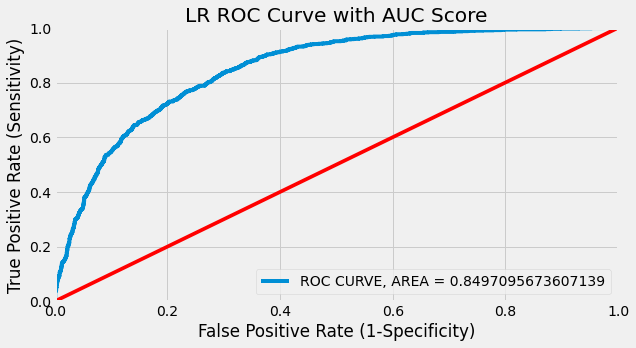

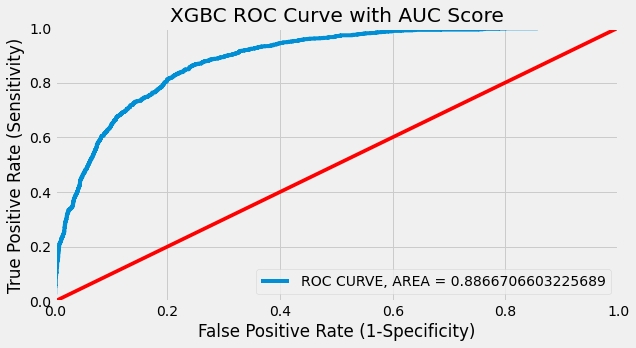

In [76]:
# Let's Compare AUC score the our best two model LR and XGBC
def plot_roc_and_auc_score(model, title):
    from sklearn.metrics import roc_curve, roc_auc_score
    probablity = model.predict_proba(X_train)[:, 1]
    plt.figure(figsize = (10, 6))
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, probablity)
    auc_score = roc_auc_score(y_train, probablity)
    plt.plot(false_positive_rate, true_positive_rate, label = "ROC CURVE, AREA = "+ str(auc_score))
    plt.plot([0, 1], [0, 1], 'red', lw = 3.7)
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.axis([0, 1, 0, 1])
    plt.legend(loc = 4)
    plt.title(title)
    plt.tight_layout(pad = 3.5)
    plt.show()

'''Plot roc curve and auc score for rf and gbc.'''
plot_roc_and_auc_score(lr, title = 'LR ROC Curve with AUC Score')
plot_roc_and_auc_score(xgbc, title = 'XGBC ROC Curve with AUC Score')

Comparing the two ROC curves, we can see the distance between blue and red line of **XGBC is greater** than the distance between blue and red line of **LR.** Hence it can safely be said that XGBC,in general, is better at discriminating between positives and negatives than LR. Also **XGBC(~ 88.67%) auc score (which is the area under the roc curve) is greater than LR(~ 84.97%).** It seems the higher the area, the further the classifier is off the red diagonal line and vice versa and hence more accurate. **Since XGBC has more area under the ROC curve than LR, therefore XGBC is more accurate.**

In [65]:
# Predicting using XGBC after Optimization and see the classification_report
preds = xgbc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2235
           1       0.66      0.53      0.59       808

    accuracy                           0.80      3043
   macro avg       0.75      0.72      0.73      3043
weighted avg       0.79      0.80      0.80      3043



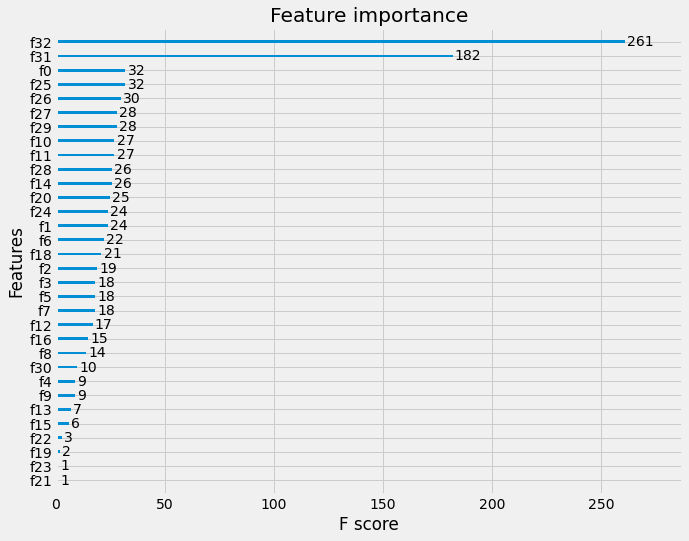

In [78]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgbc, ax=ax)

We can see that our model assigned more importance to TotalCharges and MonthlyCharges compared to others.

### Final Conclusions

The importance of this type of research in the telecom market is to help companies make more profit. It has become known that predicting churn is one of the most important sources of income to telecom companies. These prediction models need to achieve high AUC values. To test and train the model, the sample data is divided into 4000 sample for training and 3043 sample for testing. I chose to perform cross-validation with 5-folds for validation and hyperparameter optimization. 

The XGBOOST algorithms gave the best performance with 88.67% AUC, I used only stratified split gave high performance. But there is still changes of imporvement.

As model assigned more importance to TotalCharges and MonthlyCharges compared to others, so company should focus on the charges and charges shold be reasonable.

If these actions were implemented, we can used same matrics to evaluate the performance of your model, in some cases it is accuracy, or it could be precision, recall, AUC. I'd plot a daily time series charting the metric and see that it is still performing above a satisfactory threshold. Here, we are compare the actul result to predicted probabilities.